In [1]:
using Plots, PlotThemes, LaTeXStrings
using OffsetArrays
using LinearAlgebra
using FFTW
using StatsBase
using Unitful
using Base: Fix1, Fix2
using Distributions

gr()

theme(:juno)
default(;palette=:seaborn_pastel6, background_color="#1b3041", fontfamily="serif")
j=im

im

In [2]:
S = OffsetArray(sqrt(13/6).*[0, 0, 1+j, 0, 0, 0, -1-j, 0, 0, 0, 1+j, 0, 0, 0, -1-j, 0, 0, 0, -1-j, 0, 0, 0, 1+j, 0, 0, 0, 0,
0, 0, 0, -1-j, 0, 0, 0, -1-j, 0, 0, 0, 1+j, 0, 0, 0, 1+j, 0, 0, 0, 1+j, 0, 0, 0, 1+j, 0,0], -26:26)

shift(x) = [i in 1:26 ? x[i] : (i in 38:63 ? x[i-64] : 0.0+im*0.0) for i in 0:63]

function shift(x, ifft_points)
    x_shift = vcat(x[0:26], zeros(ifft_points-53), x[-26:-1])
    return x_shift
end

function make_preamble(sym) 
    sym2 = sym[length(sym)-Int(length(sym)/2)+1:end]
    return vcat(sym2, sym, sym)
end

function freq_to_wave(x, ifft_points)
    return shift(x, ifft_points) |> ifft |> make_preamble
end

freq_to_wave (generic function with 1 method)

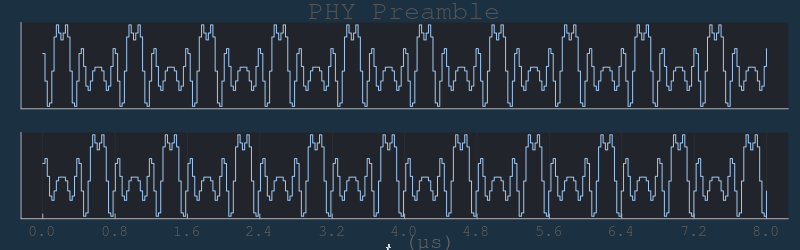

GKS: could not find font serif.ttf


In [3]:
N = 128
sym = freq_to_wave(S, N)
t = range(0u"μs", 8u"μs", length=length(sym))
tiks = [0:0.8:8...]
p2 = plot(t, imag(sym), yticks=false, line=:steppost, ylabel="canal I", xlabel=L"t", xticks = tiks, title="")
p1 = plot(t, real(sym), yticks=false, line=:steppost, ylabel="canal Q", xlabel="", xticks=[], title="PHY Preamble")

plot(p1, p2, layout=(2,1), legend = false, size=(800,250), background_color="#1b3041")

In [ ]:
range(1,2, )

In [21]:
Δf = 1e3
Ts = 8e-6
Nf = 9
ref = sym

fs = range(-Δf/2, Δf/2, length=Nf)

idx = 1
x1 = y[idx:idx+length(ref)-1]


refs = hcat([exp.(2π*j*Ts*f.*ns).*ref for f in fs]...)
hcat([x1'*r for r in eachcol(refs)]...)

1×9 Matrix{ComplexF64}:
 0.22707-0.0248488im  0.104316+0.0853228im  …  0.0548418-0.0619713im

In [20]:
function short_correlate(y, idx, ref, Ts, Δf, Nf)
    x1 = y[idx:idx+length(ref)-1]
    ns = 0:length(ref)-1
    fs = range(-Δf/2, Δf/2, length=Nf)
    refs = hcat([exp.(2π*j*Ts*f.*ns).*ref for f in fs]...)
    return hcat([x1'*r for r in eachcol(refs)]...)
end



1:4680

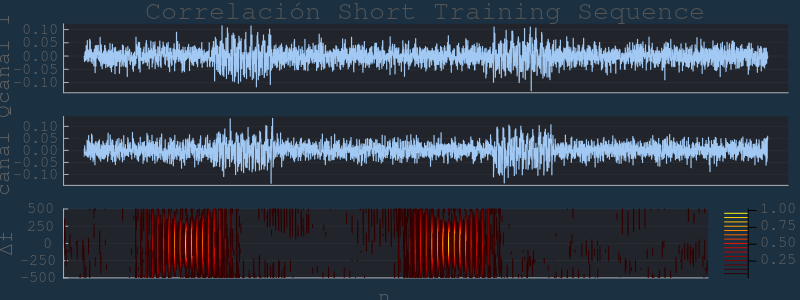

In [27]:
f_err = 0.25e3


N = 4000
start_t1 = 700
start_t2 = 2200


σ=0.025
d = Normal(0,σ)
sym_ferr = sym.*exp.(im*2*pi*f_err*Ts.* (1:length(sym)))

y = rand(d, N) .+ j.*rand(d, N)
y[start_t1+1:start_t1+length(sym)] .+= sym_ferr
y[start_t2+1:start_t2+length(sym)] .+= sym_ferr


idxs = 1:N-length(sym)
est1 = vcat([short_correlate(y, idx, ref, Ts, Δf, Nf) for idx in idxs]...)

p1 = plot(real(y[idxs]), xticks=false, line=:steppost, ylabel="canal I", xlabel="", title="Correlación Short Training Sequence")
p2 = plot(imag(y[idxs]), xticks=false, line=:steppost, ylabel="canal Q", xlabel="")
p3 = heatmap(idxs, fs, abs.(est1)', line=:steppost, ylabel="Δf", xlabel="n", xticks=[])

plot(p1, p2, p3, layout=(3,1), legend = false, size=(800,300), background_color="#1b3041")